# 13-4 oob 和更多 Bagging 相关

+ oob 的意思就是 Out-Of-Bag，意思是在我们做有放回抽样的时候，总有 37% 左右的样本一次都不会被抽到。干脆，我们就拿这些不会被抽到的数据构成测试数据集。
+ 由于 Bagging 有放回抽样的特性，我们完全可以并行处理。
+ 其它产生差异的方式有：
1. 针对特征随机采样
2. 既针对样本又针对特征随机采样

In [1]:
import numpy as np

sample_times = 500

lst = [1] * sample_times


for i in range(sample_times):
    lst[np.random.randint(sample_times)] = 0

np.sum(lst)
np.sum(lst) / sample_times

0.38

由于一定会有一些样本不会被抽到，所以这部分样本理所当然成为了测试数据集，因此我们就没有将原来的 `train_test_split` 过程。

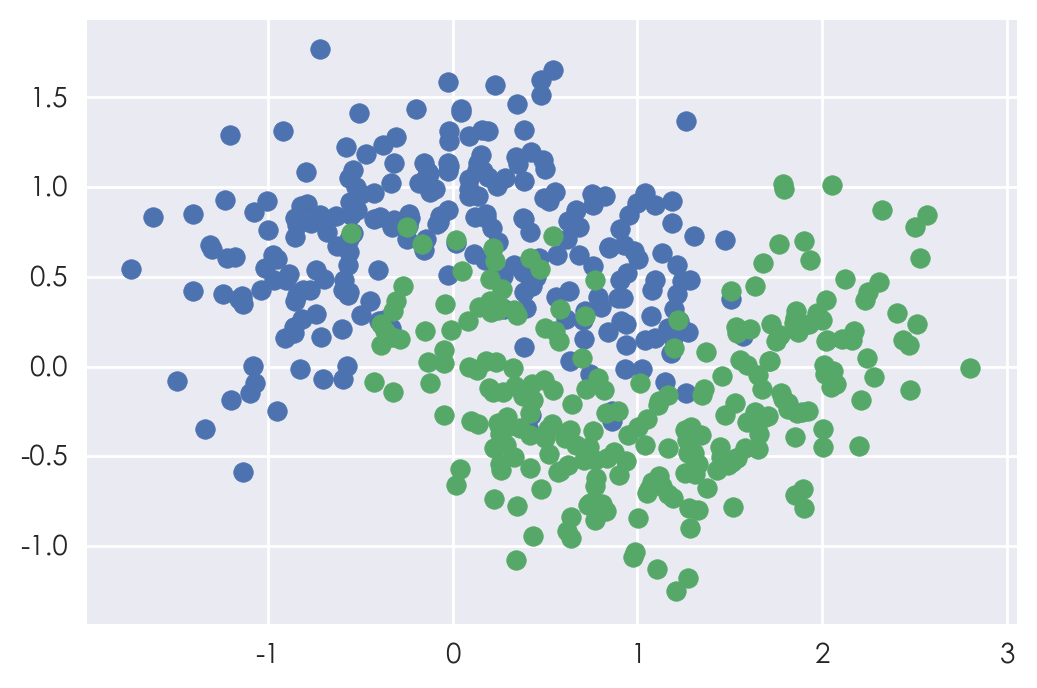

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['font.sans-serif'] = ['STHeiti']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

from sklearn import datasets

X, y = datasets.make_moons(n_samples=500, noise=0.3, random_state=42)

plt.figure(dpi=100)
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()

## oob

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                                n_estimators=500, max_samples=100,
                                bootstrap=True, oob_score=True)

bagging_clf.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=500, n_jobs=1, oob_score=True,
         random_state=None, verbose=0, warm_start=False)

In [4]:
bagging_clf.oob_score_

0.92

## n_jobs

In [5]:
%%time

bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                                n_estimators=500, max_samples=100,
                                bootstrap=True, oob_score=True)
bagging_clf.fit(X, y)

CPU times: user 669 ms, sys: 5.96 ms, total: 675 ms
Wall time: 676 ms


In [6]:
%%time

bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                                n_estimators=500, max_samples=100,
                                bootstrap=True, oob_score=True, n_jobs=-1)
bagging_clf.fit(X, y)

CPU times: user 165 ms, sys: 33.4 ms, total: 199 ms
Wall time: 468 ms


bootstrap_features

## 随机选取特征

In [7]:
random_subspaces_clf = BaggingClassifier(DecisionTreeClassifier(),
                                         n_estimators=500, max_samples=500,
                                         bootstrap=True, oob_score=True,
                                         max_features=1, bootstrap_features=True)
random_subspaces_clf.fit(X, y)
random_subspaces_clf.oob_score_

0.836

In [8]:
random_patches_clf = BaggingClassifier(DecisionTreeClassifier(),
                                       n_estimators=500, max_samples=100,
                                       bootstrap=True, oob_score=True,
                                       max_features=1, bootstrap_features=True)
random_patches_clf.fit(X, y)
random_patches_clf.oob_score_

0.862